In [4]:
import pandas as pd
import MySQLdb

HOST = "ec2-54-95-8-243.ap-northeast-1.compute.amazonaws.com"

db = MySQLdb.connect(
    HOST,
    "team04",
    "1111",
    "resell"
)

QUERY = """
    SELECT *
    FROM model_rgb;
"""

df = pd.read_sql(QUERY, db)

C:\Users\yhn03\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [2]:
df

,model_no,R,G,B,cluster_R,cluster_G,cluster_B
0,130207-061,51,51,51,32,33,33
1,130207-061,30,30,30,32,33,33
2,130207-061,51,51,51,32,33,33
3,130207-061,47,47,47,32,33,33
4,130207-061,34,35,35,32,33,33
...,...,...,...,...,...,...,...
7529625,JBM231-M19-C1,59,59,59,54,56,57
7529626,JBM231-M19-C1,62,62,62,54,56,57
7529627,JBM231-M19-C1,55,55,55,54,56,57
7529628,JBM231-M19-C1,44,44,44,54,56,57


In [5]:
file2 = 'color_cluster.csv'
df2 = pd.read_csv(file2, index_col=0)

In [6]:
df2.head(5)

,cluster_R,cluster_G,cluster_B,color
Unnamed: 0,,,,
0,32,33,33,검정
1,154,26,31,빨강
2,212,213,212,흰색
3,154,45,51,빨강
4,230,230,228,흰색


In [7]:
df2 = df2.reset_index(drop=True)
df2

,cluster_R,cluster_G,cluster_B,color
0,32,33,33,검정
1,154,26,31,빨강
2,212,213,212,흰색
3,154,45,51,빨강
4,230,230,228,흰색
...,...,...,...,...
10822,130,146,8,황토
10823,143,162,4,연두
10824,35,68,108,남색
10825,54,56,57,검정


In [8]:
df['cluster_RGB'] = df['cluster_R'].astype(str) + df['cluster_G'].astype(str) + df['cluster_B'].astype(str)
df

,model_no,R,G,B,cluster_R,cluster_G,cluster_B,cluster_RGB
0,130207-061,51,51,51,32,33,33,323333
1,130207-061,30,30,30,32,33,33,323333
2,130207-061,51,51,51,32,33,33,323333
3,130207-061,47,47,47,32,33,33,323333
4,130207-061,34,35,35,32,33,33,323333
...,...,...,...,...,...,...,...,...
7529625,JBM231-M19-C1,59,59,59,54,56,57,545657
7529626,JBM231-M19-C1,62,62,62,54,56,57,545657
7529627,JBM231-M19-C1,55,55,55,54,56,57,545657
7529628,JBM231-M19-C1,44,44,44,54,56,57,545657


In [9]:
df2['cluster_RGB'] = df2['cluster_R'].astype(str) + df2['cluster_G'].astype(str) + df2['cluster_B'].astype(str)
df2

,cluster_R,cluster_G,cluster_B,color,cluster_RGB
0,32,33,33,검정,323333
1,154,26,31,빨강,1542631
2,212,213,212,흰색,212213212
3,154,45,51,빨강,1544551
4,230,230,228,흰색,230230228
...,...,...,...,...,...
10822,130,146,8,황토,1301468
10823,143,162,4,연두,1431624
10824,35,68,108,남색,3568108
10825,54,56,57,검정,545657


In [10]:
df2 = df2.drop_duplicates('cluster_RGB')
df2

,cluster_R,cluster_G,cluster_B,color,cluster_RGB
0,32,33,33,검정,323333
1,154,26,31,빨강,1542631
2,212,213,212,흰색,212213212
3,154,45,51,빨강,1544551
4,230,230,228,흰색,230230228
...,...,...,...,...,...
10821,168,198,103,연두,168198103
10822,130,146,8,황토,1301468
10823,143,162,4,연두,1431624
10824,35,68,108,남색,3568108


In [11]:
pixel = df.merge(df2[['cluster_RGB', 'color']], on='cluster_RGB', how="left")
pixel = pixel.drop('cluster_RGB', axis=1)
pixel

,model_no,R,G,B,cluster_R,cluster_G,cluster_B,color
0,130207-061,51,51,51,32,33,33,검정
1,130207-061,30,30,30,32,33,33,검정
2,130207-061,51,51,51,32,33,33,검정
3,130207-061,47,47,47,32,33,33,검정
4,130207-061,34,35,35,32,33,33,검정
...,...,...,...,...,...,...,...,...
7529625,JBM231-M19-C1,59,59,59,54,56,57,검정
7529626,JBM231-M19-C1,62,62,62,54,56,57,검정
7529627,JBM231-M19-C1,55,55,55,54,56,57,검정
7529628,JBM231-M19-C1,44,44,44,54,56,57,검정


In [12]:
pixel2 = pixel.groupby(['model_no','cluster_R','cluster_G','cluster_B','color']).count()
pixel2

R     G     B
model_no      cluster_R cluster_G cluster_B color                  
130207-061    32        33        33        검정     1443  1443  1443
              154       26        31        빨강      660   660   660
                        45        51        빨강       35    35    35
              212       213       212       흰색      514   514   514
130207-101    23        23        25        검정      419   419   419
...                                                 ...   ...   ...
DX4446-301    168       198       103       연두       91    91    91
              194       194       195       밝은회색    855   855   855
JBM231-M19-C1 35        68        108       남색     1424  1424  1424
              54        56        57        검정     1329  1329  1329
              232       234       231       흰색       82    82    82

[10827 rows x 3 columns]

In [13]:
pixel3 = pixel2.drop(['G','B'], axis=1)
pixel3

R
model_no      cluster_R cluster_G cluster_B color      
130207-061    32        33        33        검정     1443
              154       26        31        빨강      660
                        45        51        빨강       35
              212       213       212       흰색      514
130207-101    23        23        25        검정      419
...                                                 ...
DX4446-301    168       198       103       연두       91
              194       194       195       밝은회색    855
JBM231-M19-C1 35        68        108       남색     1424
              54        56        57        검정     1329
              232       234       231       흰색       82

[10827 rows x 1 columns]

In [14]:
pixel4 = pixel3.reset_index()
pixel4

,model_no,cluster_R,cluster_G,cluster_B,color,R
0,130207-061,32,33,33,검정,1443
1,130207-061,154,26,31,빨강,660
2,130207-061,154,45,51,빨강,35
3,130207-061,212,213,212,흰색,514
4,130207-101,23,23,25,검정,419
...,...,...,...,...,...,...
10822,DX4446-301,168,198,103,연두,91
10823,DX4446-301,194,194,195,밝은회색,855
10824,JBM231-M19-C1,35,68,108,남색,1424
10825,JBM231-M19-C1,54,56,57,검정,1329


In [15]:
pixel5 = pixel4.drop(['cluster_R','cluster_G','cluster_B'], axis=1)
pixel5

,model_no,color,R
0,130207-061,검정,1443
1,130207-061,빨강,660
2,130207-061,빨강,35
3,130207-061,흰색,514
4,130207-101,검정,419
...,...,...,...
10822,DX4446-301,연두,91
10823,DX4446-301,밝은회색,855
10824,JBM231-M19-C1,남색,1424
10825,JBM231-M19-C1,검정,1329


In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [16]:
pixel6 = pd.pivot_table(pixel5, index = 'model_no', columns = 'color', values='R')
pixel7 = pixel6.fillna(0)
pixel8 = pixel7.div(pixel7.sum(axis=1), axis=0)
pixel8 = pixel8.reset_index()
pixel8

color,model_no,갈색,검정,고동,남색,노랑,모카,민트,발블,밝은회색,...,진한회색,청록,청회색,초록,파랑,하늘,황갈색,황토,회색,흰색
0,130207-061,0.0,0.626166,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.223042
1,130207-101,0.0,0.187556,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.547449
2,130245-062,0.0,0.794054,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.017404,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.166788
3,136002-061,0.0,0.754568,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.245432
4,136002-132,0.0,0.377099,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.029924,0.592977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,DV3528-102,0.0,0.032235,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.848854
2989,DV3529-102,0.0,0.041051,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.665846
2990,DV3605-410,0.0,0.026815,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.041203,0.0,0.000000,0.000000,0.931982
2991,DX4446-301,0.0,0.421451,0.0,0.000000,0.0,0.128171,0.0,0.0,0.380507,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.044059,0.000000,0.000000


In [17]:
df_kream = pd.read_csv('C:/Users/yhn03/MulticampusProject/3rd/kream_info.csv')
df_kream

,_id,brand,prod_kr_name,rescent_price,model_no,release_date,colors,release_price,instant_buy_price,instant_sell_price,...,Jordan 14,Jordan 15,Jordan 16,Jordan 17,Jordan 18,Jordan 19,Jordan 20,Jordan 21,Jordan 22,Jordan 23
0,Jordan 1 Low Vintage Grey,Jordan,조던 1 로우 빈티지 그레이,200000,553558-053,1900-01-01,GREY/WHITE/CREAM,129000,202000,201000,...,0,0,0,0,0,0,0,0,0,0
1,Jordan 1 x Travis Scott x Fragment Retro Low O...,Jordan,조던 1 x 트래비스 스캇 x 프라그먼트 레트로 로우 OG SP 밀리터리 블루,1555000,DM7866-140,2021-08-13,SAIL/BLACK/MILITARY BLUE,189000,1540000,2230000,...,0,0,0,0,0,0,0,0,0,0
2,Jordan 1 Retro High OG Black Mocha,Jordan,조던 1 레트로 하이 OG 블랙 모카,702000,555088-105,2020-11-13,SAIL/DARK MOCHA-BLACK-BLACK,199000,600000,818000,...,0,0,0,0,0,0,0,0,0,0
3,Jordan 4 Retro White and Black,Jordan,조던 4 레트로 화이트 앤 블랙,312000,DH6927-111,2022-05-23,WHITE/BLACK/NEUTRAL GREY,249000,299000,313000,...,0,0,0,0,0,0,0,0,0,0
4,Jordan 1 Retro High OG Bleached Coral,Jordan,조던 1 레트로 하이 OG 블리치드 코랄,244000,555088-108,2022-05-14,WHITE/BLACK/GREY FOG/BLEACHED CORAL,209000,207000,270000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,Jordan 1 Retro High OG SP Gina (Special Box),Jordan,조던 1 레트로 하이 OG SP 지나 (스페셜 박스),0,CD7071-001,2019-05-25,BLACK/BLACK-WHITE-VARSITY RED,234600,0,0,...,0,0,0,0,0,0,0,0,0,0
2989,Jordan 13 Retro Low Quai 54,Jordan,조던 13 레트로 로우 콰이 54,0,810551-050,2015-06-14,BLACK/DARK GREY-WHITE-CHROME,325200,0,0,...,0,0,0,0,0,0,0,0,0,0
2990,(GS) Jordan 11 Retro Heiress Velvet,Jordan,(GS) 조던 11 레트로 헤어리스 벨벳,290000,852625-650,2016-12-18,NIGHT MAROON/METALLIC GOLD-NIGHT MAROON,286200,340000,180000,...,0,0,0,0,0,0,0,0,0,0
2991,Jordan 1 Retro High Flyknit Derek Jeter RE2PECT,Jordan,조던 1 레트로 하이 플라이니트 데릭 지터 RE2PECT,350000,AH7233-105,2018-02-24,SAIL/METALLIC GOLD-MIDNIGHT NAVY,234100,380000,150000,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_kream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 2993 non-null   object
 1   brand               2993 non-null   object
 2   prod_kr_name        2993 non-null   object
 3   rescent_price       2993 non-null   int64 
 4   model_no            2993 non-null   object
 5   release_date        2993 non-null   object
 6   colors              2993 non-null   object
 7   release_price       2993 non-null   int64 
 8   instant_buy_price   2993 non-null   int64 
 9   instant_sell_price  2993 non-null   int64 
 10  img_url             2993 non-null   object
 11  OG                  2993 non-null   int64 
 12  Retro               2993 non-null   int64 
 13  SP                  2993 non-null   int64 
 14  QS                  2993 non-null   int64 
 15  SB                  2993 non-null   int64 
 16  SE                  2993

In [30]:
df_kream['model_no'] = df_kream['model_no'].apply(lambda x: x.strip())

In [32]:
df_result = df_kream.merge(pixel8, on='model_no')

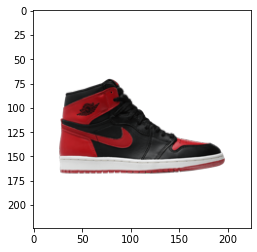

0    검정
1    빨강
2    빨강
3    흰색
Name: color, dtype: object


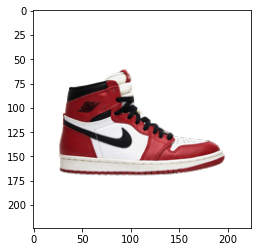

4    검정
5    빨강
6    빨강
7    흰색
Name: color, dtype: object


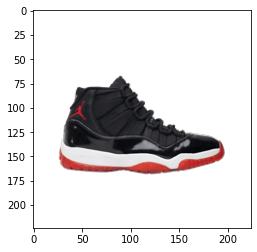

8       검정
9     진한회색
10      빨강
11      빨강
12      흰색
Name: color, dtype: object


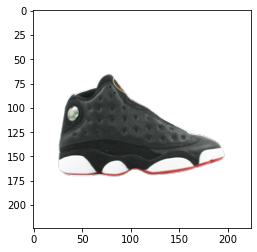

13    검정
14    검정
15    흰색
Name: color, dtype: object


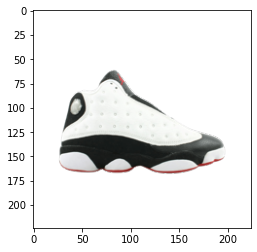

16    검정
17    회색
18    흰색
Name: color, dtype: object


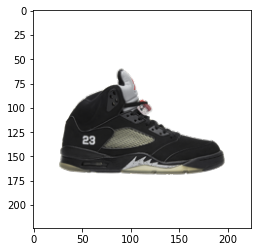

19      검정
20      회색
21    밝은회색
22    밝은회색
Name: color, dtype: object


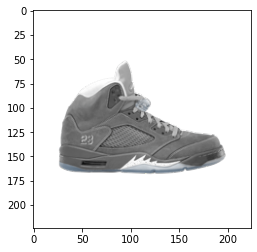

23    회색
24    회색
25    흰색
26    흰색
Name: color, dtype: object


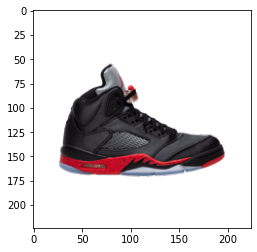

27    검정
28    회색
29    빨강
30    흰색
Name: color, dtype: object


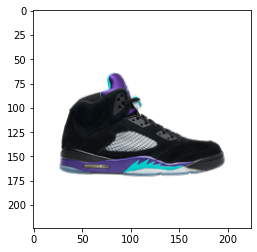

31      하늘
32      검정
33      보라
34      발블
35    진한회색
36      회색
37    밝은회색
Name: color, dtype: object


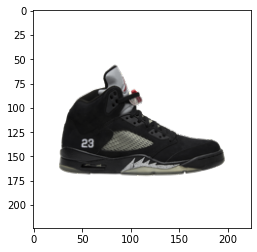

38      검정
39      회색
40    밝은회색
Name: color, dtype: object


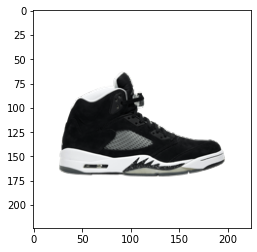

41    검정
42    흰색
Name: color, dtype: object


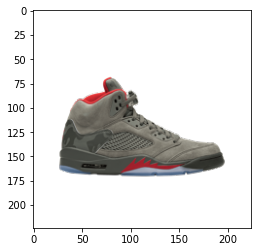

43      발블
44    진한회색
45      빨강
Name: color, dtype: object


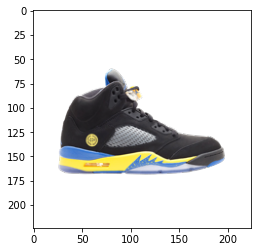

46    진한회색
47      하늘
48      회색
49      흰색
50      노랑
Name: color, dtype: object


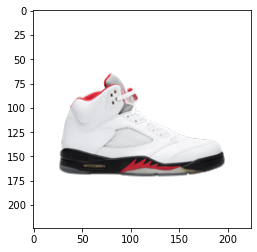

51      검정
52    진한회색
53      빨강
54      흰색
Name: color, dtype: object


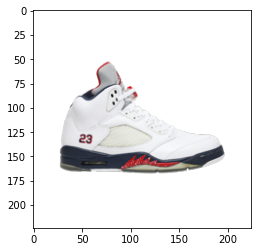

55      남색
56    진한회색
57    밝은회색
58      흰색
Name: color, dtype: object


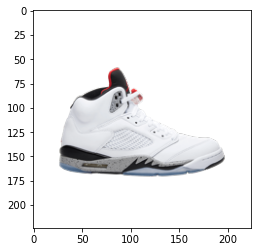

59      검정
60    진한회색
61      발블
62      회색
63    밝은회색
64      흰색
Name: color, dtype: object


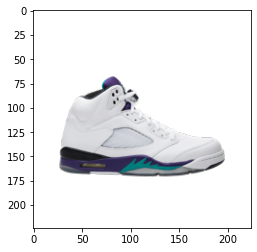

65      청록
66      검정
67      검정
68      남색
69      검정
70    진한회색
71      흰색
Name: color, dtype: object


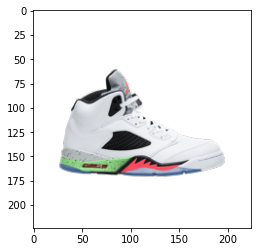

72    검정
73    발블
74    발블
75    초록
76    흰색
Name: color, dtype: object


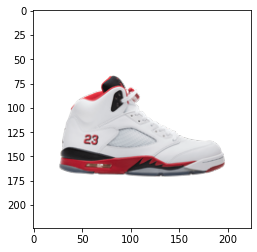

77      검정
78      검정
79    진한회색
80      빨강
81    밝은회색
82      빨강
83      흰색
Name: color, dtype: object


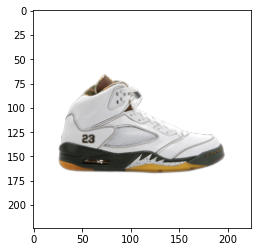

84      검정
85    진한회색
86      황토
87      흰색
Name: color, dtype: object


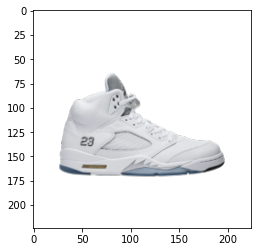

88      남색
89      회색
90      회색
91    밝은회색
92      흰색
Name: color, dtype: object


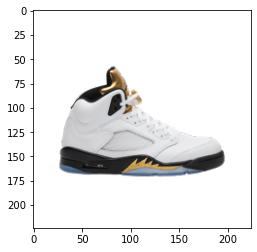

93    검정
94    발블
95    흰색
Name: color, dtype: object


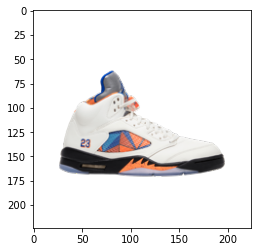

96    검정
97    회색
98    흰색
Name: color, dtype: object


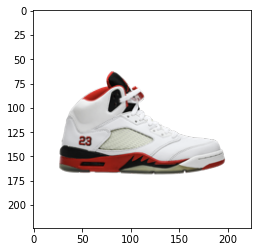

99     검정
100    검정
101    검정
102    빨강
103    흰색
Name: color, dtype: object


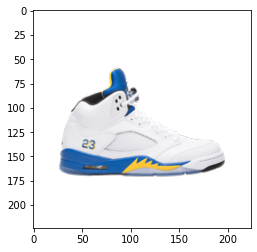

104      파랑
105      검정
106      발블
107    밝은회색
108      흰색
109      노랑
Name: color, dtype: object


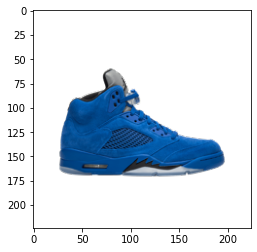

110    파랑
111    검정
112    발블
113    발블
114    흰색
Name: color, dtype: object


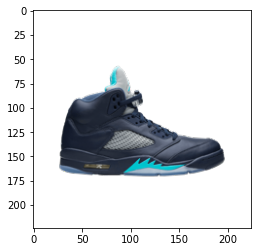

115    하늘
116    검정
117    발블
118    회색
119    회색
Name: color, dtype: object


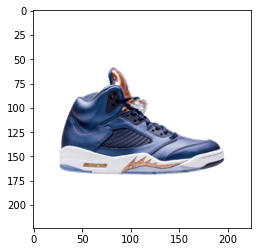

120      남색
121      남색
122    밝은회색
123    밝은회색
124      흰색
125      흰색
Name: color, dtype: object


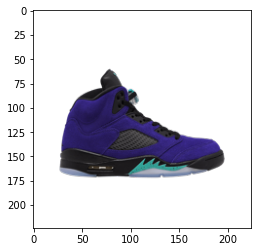

126      검정
127      남색
128      민트
129    밝은회색
Name: color, dtype: object


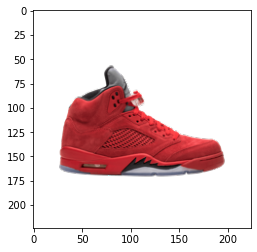

130    검정
131    검정
132    빨강
Name: color, dtype: object


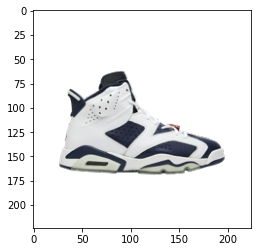

133      남색
134    진한회색
135    진한회색
136    밝은회색
137    밝은회색
138      흰색
Name: color, dtype: object


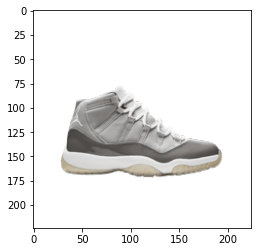

139      회색
140    밝은회색
141     베이지
Name: color, dtype: object


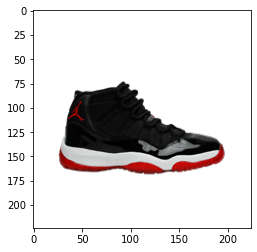

142      검정
143    진한회색
144      회색
145      빨강
146      빨강
147      흰색
Name: color, dtype: object


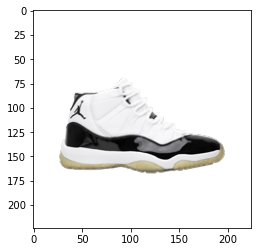

148     검정
149     회색
150    황갈색
151    베이지
152     흰색
Name: color, dtype: object


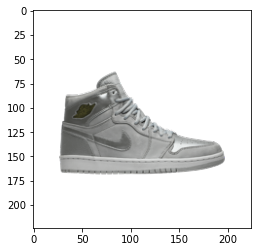

153    검정
154    회색
Name: color, dtype: object


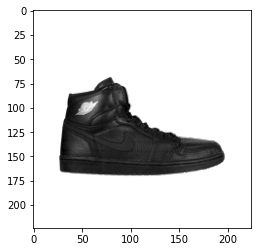

155    검정
156    회색
Name: color, dtype: object


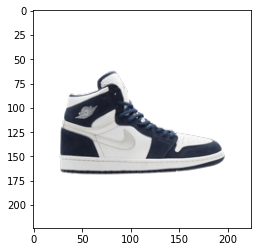

157      남색
158      회색
159      회색
160    밝은회색
161      흰색
Name: color, dtype: object


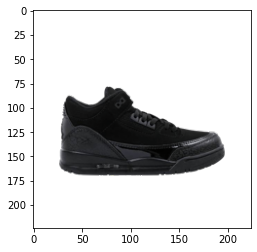

162    검정
Name: color, dtype: object


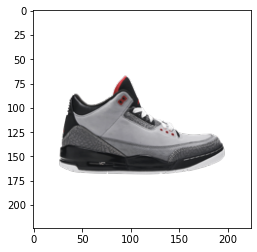

163    회색
Name: color, dtype: object


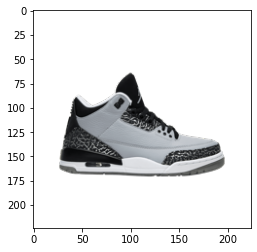

164    검정
165    회색
166    흰색
Name: color, dtype: object


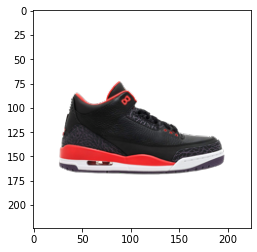

167    검정
168    흰색
169    빨강
Name: color, dtype: object


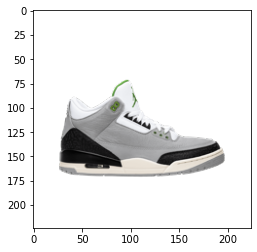

170      검정
171      회색
172    밝은회색
173      흰색
174      흰색
Name: color, dtype: object


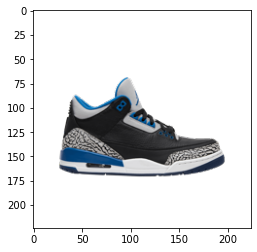

175    파랑
176    검정
177    회색
Name: color, dtype: object


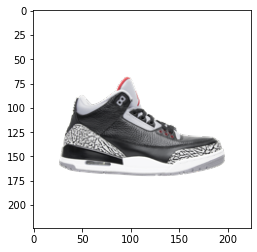

178    회색
Name: color, dtype: object


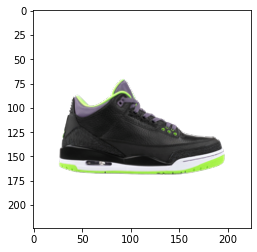

179    검정
180    회색
181    회색
182    연두
183    흰색
Name: color, dtype: object


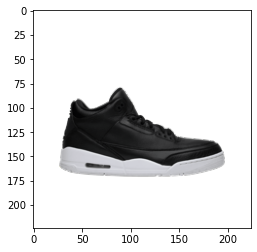

184      검정
185    밝은회색
186    밝은회색
Name: color, dtype: object


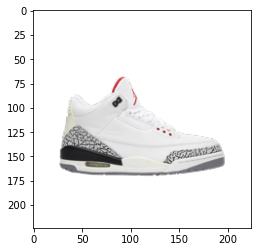

187    검정
188    회색
189    흰색
190    흰색
Name: color, dtype: object


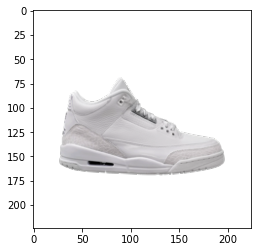

191    흰색
Name: color, dtype: object


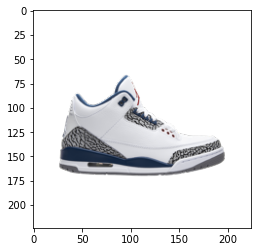

192      남색
193      회색
194      회색
195    밝은회색
196      흰색
Name: color, dtype: object


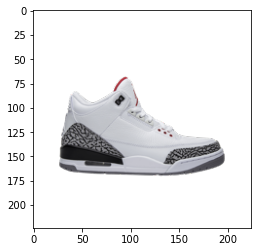

197      검정
198    진한회색
199      회색
200      회색
201    밝은회색
Name: color, dtype: object


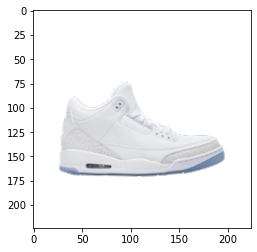

202    청회색
203     발블
204     발블
205     흰색
Name: color, dtype: object


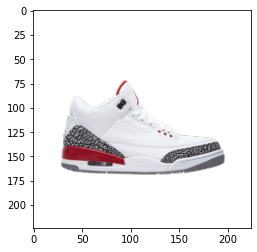

206    진한회색
207      빨강
208    밝은회색
209      흰색
Name: color, dtype: object


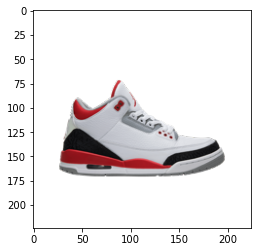

210      검정
211    진한회색
212      회색
213      빨강
214    밝은회색
Name: color, dtype: object


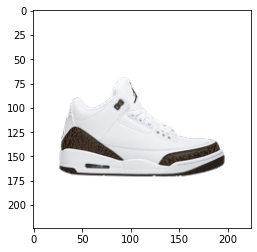

215    검정
216    흰색
Name: color, dtype: object


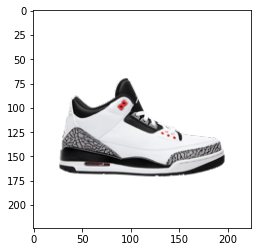

217    진한회색
218    밝은회색
219    밝은회색
220      흰색
Name: color, dtype: object


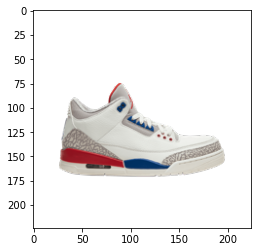

221      파랑
222      빨강
223    밝은회색
Name: color, dtype: object


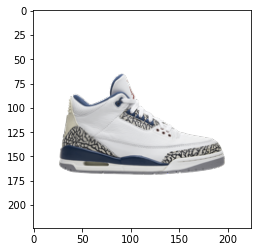

224    남색
225    흰색
Name: color, dtype: object


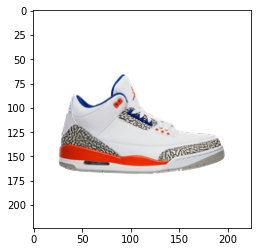

226      회색
227    밝은회색
228      빨강
229      흰색
230      빨강
Name: color, dtype: object


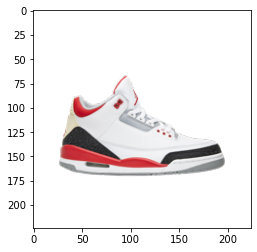

231      검정
232      회색
233      빨강
234    아이보리
235      흰색
Name: color, dtype: object


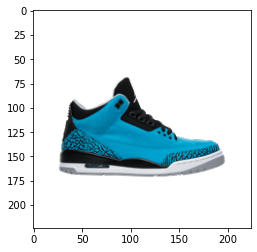

236      파랑
237      검정
238    진한회색
239      회색
240      회색
241      흰색
Name: color, dtype: object


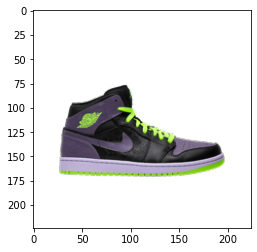

242      검정
243      회색
244      회색
245      연두
246    밝은회색
247      흰색
Name: color, dtype: object


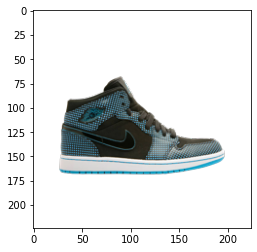

248     파랑
249     검정
250    청회색
251     흰색
252     흰색
Name: color, dtype: object


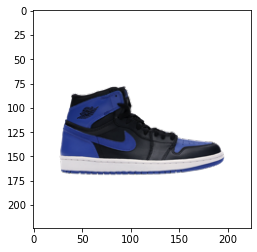

253    남색
254    검정
255    파랑
256    흰색
Name: color, dtype: object


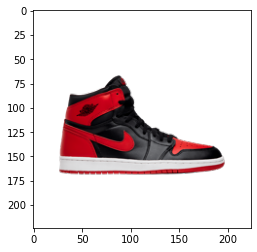

257    검정
258    빨강
259    빨강
260    흰색
Name: color, dtype: object


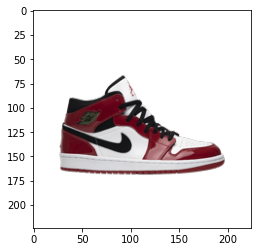

261    검정
262    빨강
263    분홍
264    흰색
Name: color, dtype: object


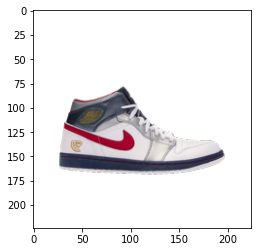

265    진한회색
266      빨강
267      흰색
Name: color, dtype: object


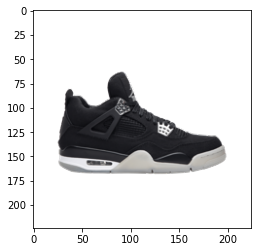

268      검정
269      회색
270      회색
271    밝은회색
272      흰색
Name: color, dtype: object


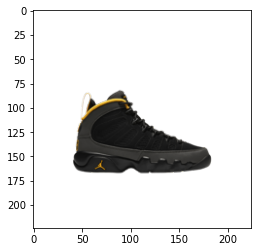

273    검정
Name: color, dtype: object


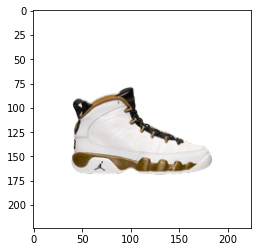

274    검정
275    검정
276    검정
277    갈색
278    흰색
Name: color, dtype: object


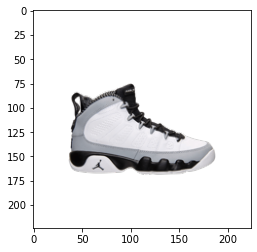

279      검정
280    진한회색
281      흰색
282      흰색
Name: color, dtype: object


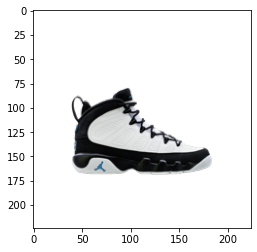

283    검정
284    흰색
Name: color, dtype: object


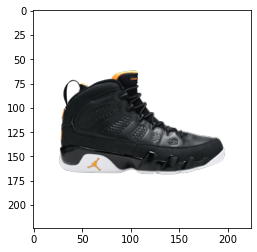

285    검정
286    흰색
287    흰색
Name: color, dtype: object


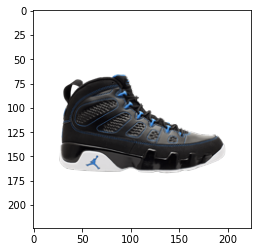

288      검정
289    진한회색
290      회색
291      흰색
Name: color, dtype: object


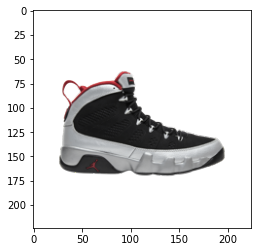

292      검정
293      회색
294    밝은회색
Name: color, dtype: object


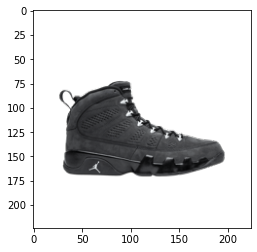

295    진한회색
Name: color, dtype: object


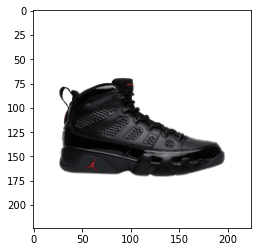

296    검정
Name: color, dtype: object


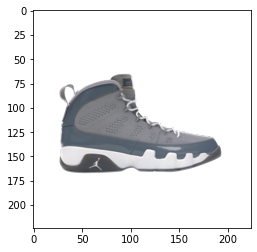

297    회색
298    흰색
299    흰색
300    흰색
Name: color, dtype: object


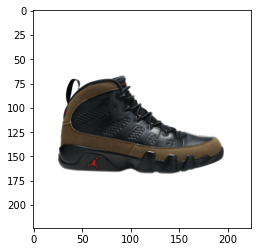

301    검정
302    갈색
Name: color, dtype: object


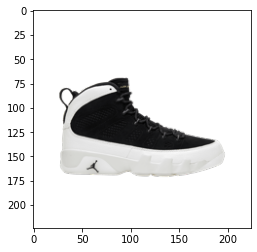

303    검정
304    흰색
305    흰색
Name: color, dtype: object


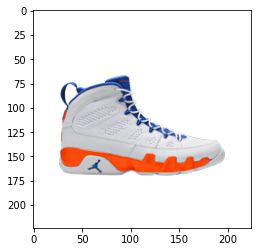

306    흰색
307    주황
Name: color, dtype: object


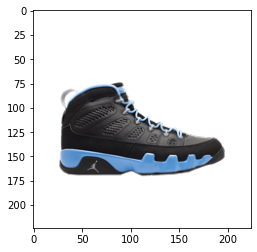

308    검정
309    하늘
Name: color, dtype: object


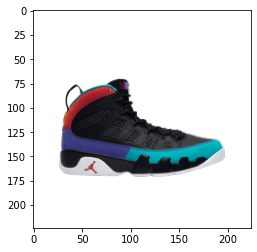

310    하늘
311    검정
312    보라
313    빨강
314    흰색
Name: color, dtype: object


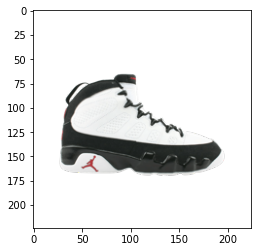

315      검정
316      회색
317      회색
318    밝은회색
319      흰색
Name: color, dtype: object


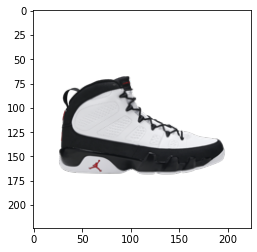

320      검정
321    진한회색
322    진한회색
323      회색
324      흰색
Name: color, dtype: object


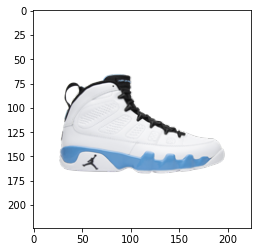

325    검정
326    검정
327    하늘
328    흰색
Name: color, dtype: object


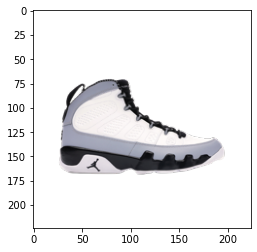

329      검정
330    진한회색
331      흰색
Name: color, dtype: object


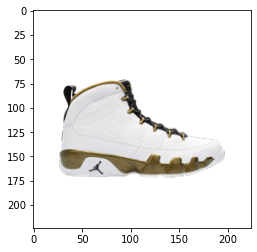

332    검정
333    검정
334    갈색
335    흰색
Name: color, dtype: object


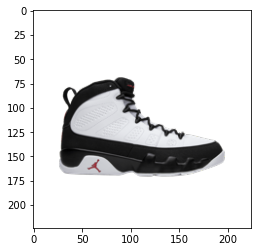

336      검정
337      검정
338    진한회색
339      흰색
Name: color, dtype: object


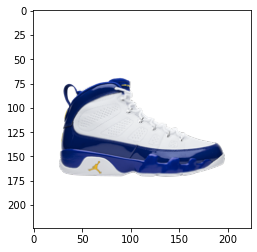

340    파랑
341    남색
342    발블
343    발블
344    흰색
Name: color, dtype: object


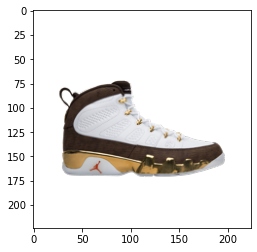

345     검정
346    황갈색
347     황토
348     황토
349     흰색
Name: color, dtype: object


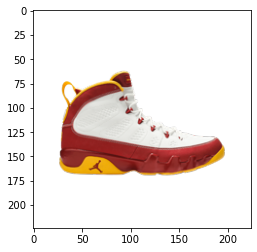

350    빨강
351    흰색
352    황토
Name: color, dtype: object


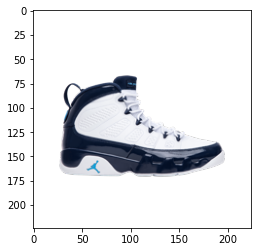

353      남색
354      발블
355      회색
356    밝은회색
357      흰색
Name: color, dtype: object


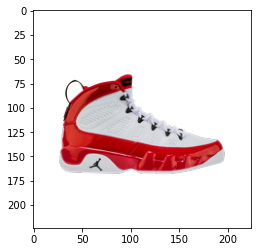

358    고동
359    빨강
360    빨강
361    빨강
362    흰색
363    빨강
Name: color, dtype: object


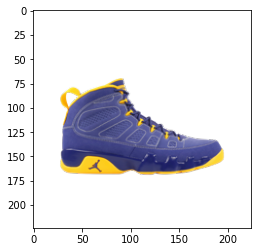

364    발블
365    노랑
366    노랑
Name: color, dtype: object


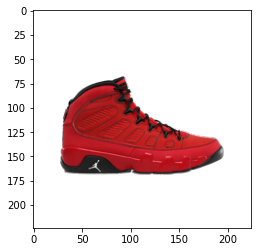

367      검정
368    진한회색
369      빨강
370      빨강
Name: color, dtype: object


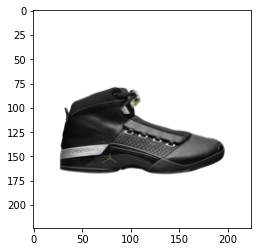

371    검정
Name: color, dtype: object


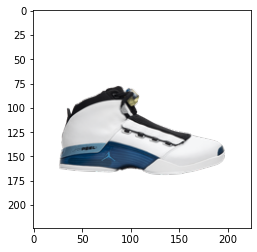

372    남색
373    남색
374    남색
375    검정
376    흰색
Name: color, dtype: object


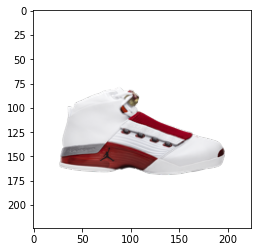

377      빨강
378      회색
379      빨강
380    밝은회색
381      흰색
Name: color, dtype: object


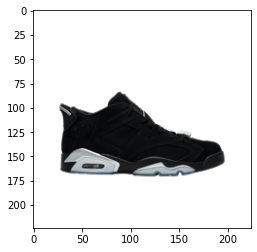

382      검정
383    진한회색
384      흰색
Name: color, dtype: object


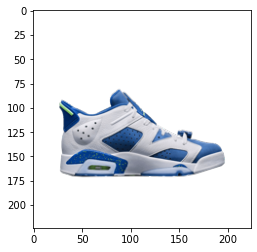

385    파랑
386    파랑
387    파랑
388    파랑
389    흰색
Name: color, dtype: object


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

img_dir = 'C:/Users/yhn03/MulticampusProject/3rd/image5'

for model_no in pixel5['model_no'].unique()[:100]:
    img_name = model_no.strip().replace('/', ' ')
    file = f'{img_dir}/{img_name}.png'
    img = Image.open(file)
    
    plt.imshow(img)
    plt.show()
    
    print(pixel5[pixel5['model_no'] == model_no]['color'])

In [33]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 2992
Columns: 116 entries, _id to 흰색
dtypes: float64(28), int64(81), object(7)
memory usage: 2.7+ MB


In [36]:
df_result.loc[0, 'release_date'] = '2022-07-05'

In [41]:
df_result['release_date'] = pd.to_datetime(df_result['release_date'])

In [46]:
df_result.to_csv('kream_product.csv', index=False)